In [1]:
import seaborn as sns
import sklearn as sk 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Assignment 2 - data Mashable.csv')
df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24999 entries, 0 to 24998
Data columns (total 27 columns):
id                               24999 non-null int64
url                              24999 non-null object
n_tokens_title                   24999 non-null int64
n_tokens_content                 24999 non-null int64
num_imgs                         24999 non-null int64
num_videos                       24999 non-null int64
average_token_length             24999 non-null float64
data_channel_is_lifestyle        24999 non-null int64
data_channel_is_entertainment    24999 non-null int64
data_channel_is_bus              24999 non-null int64
data_channel_is_socmed           24999 non-null int64
data_channel_is_tech             24999 non-null int64
data_channel_is_world            24999 non-null int64
weekday_is_monday                24999 non-null int64
weekday_is_tuesday               24999 non-null int64
weekday_is_wednesday             24999 non-null int64
weekday_is_thursday     

In [3]:
#changing the column titles based on the information from the url in markdown.
df.rename(columns ={"n_tokens_title" : "words_title", "average_token_length" : "word_length", "data_channel_is_lifestyle": "lifestyle", "data_channel_is_entertainment" : "entertainment", "data_channel_is_bus" : "business", "data_channel_is_socmed": "social_media", "data_channel_is_tech" : "technology", "data_channel_is_world" : "world",  "n_tokens_content" : "words_content", "num_imgs" : "images", "num_videos" : "videos", "weekday_is_monday": 'monday', "weekday_is_tuesday" : "tuesday", "weekday_is_wednesday" : "wednesday", "weekday_is_thursday" : "thursday", "weekday_is_friday" : "friday", "weekday_is_saturday": "saturday" , "weekday_is_sunday" : "sunday", "is_weekend" : "weekend"},inplace = True)
df.head()

,id,url,words_title,words_content,images,videos,word_length,lifestyle,entertainment,business,...,friday,saturday,sunday,weekend,global_subjectivity,global_sentiment_polarity,title_subjectivity,title_sentiment_polarity,shares,shares_log
0,1,http://mashable.com/2013/10/29/ashton-kutcher-...,10,821,12,0,4.518879,0,0,0,...,0,0,0,0,0.439379,0.082486,0.666667,0.375,2100,3.322219
1,2,http://mashable.com/2014/09/08/mashies-sept-19...,9,489,6,0,5.040900,0,0,0,...,0,0,0,0,0.300454,0.027715,0.000000,0.000,274,2.437751
2,3,http://mashable.com/2013/02/01/hello-kitty-roc...,11,131,0,1,4.877863,0,0,0,...,1,0,0,0,0.575486,0.259120,0.000000,0.000,1500,3.176091
3,4,http://mashable.com/2014/02/06/add-us-on-snapc...,8,556,2,0,4.974820,0,0,1,...,0,0,0,0,0.327220,0.134424,0.000000,0.000,2000,3.301030
4,5,http://mashable.com/2014/01/07/lindsey-vonn-wi...,9,880,18,0,4.928409,0,0,0,...,0,0,0,0,0.507709,0.109256,0.000000,0.000,6000,3.778151


Changed the names based on the information in the data set (got the information from the following url: https://archive.ics.uci.edu/ml/datasets/online+news+popularity)




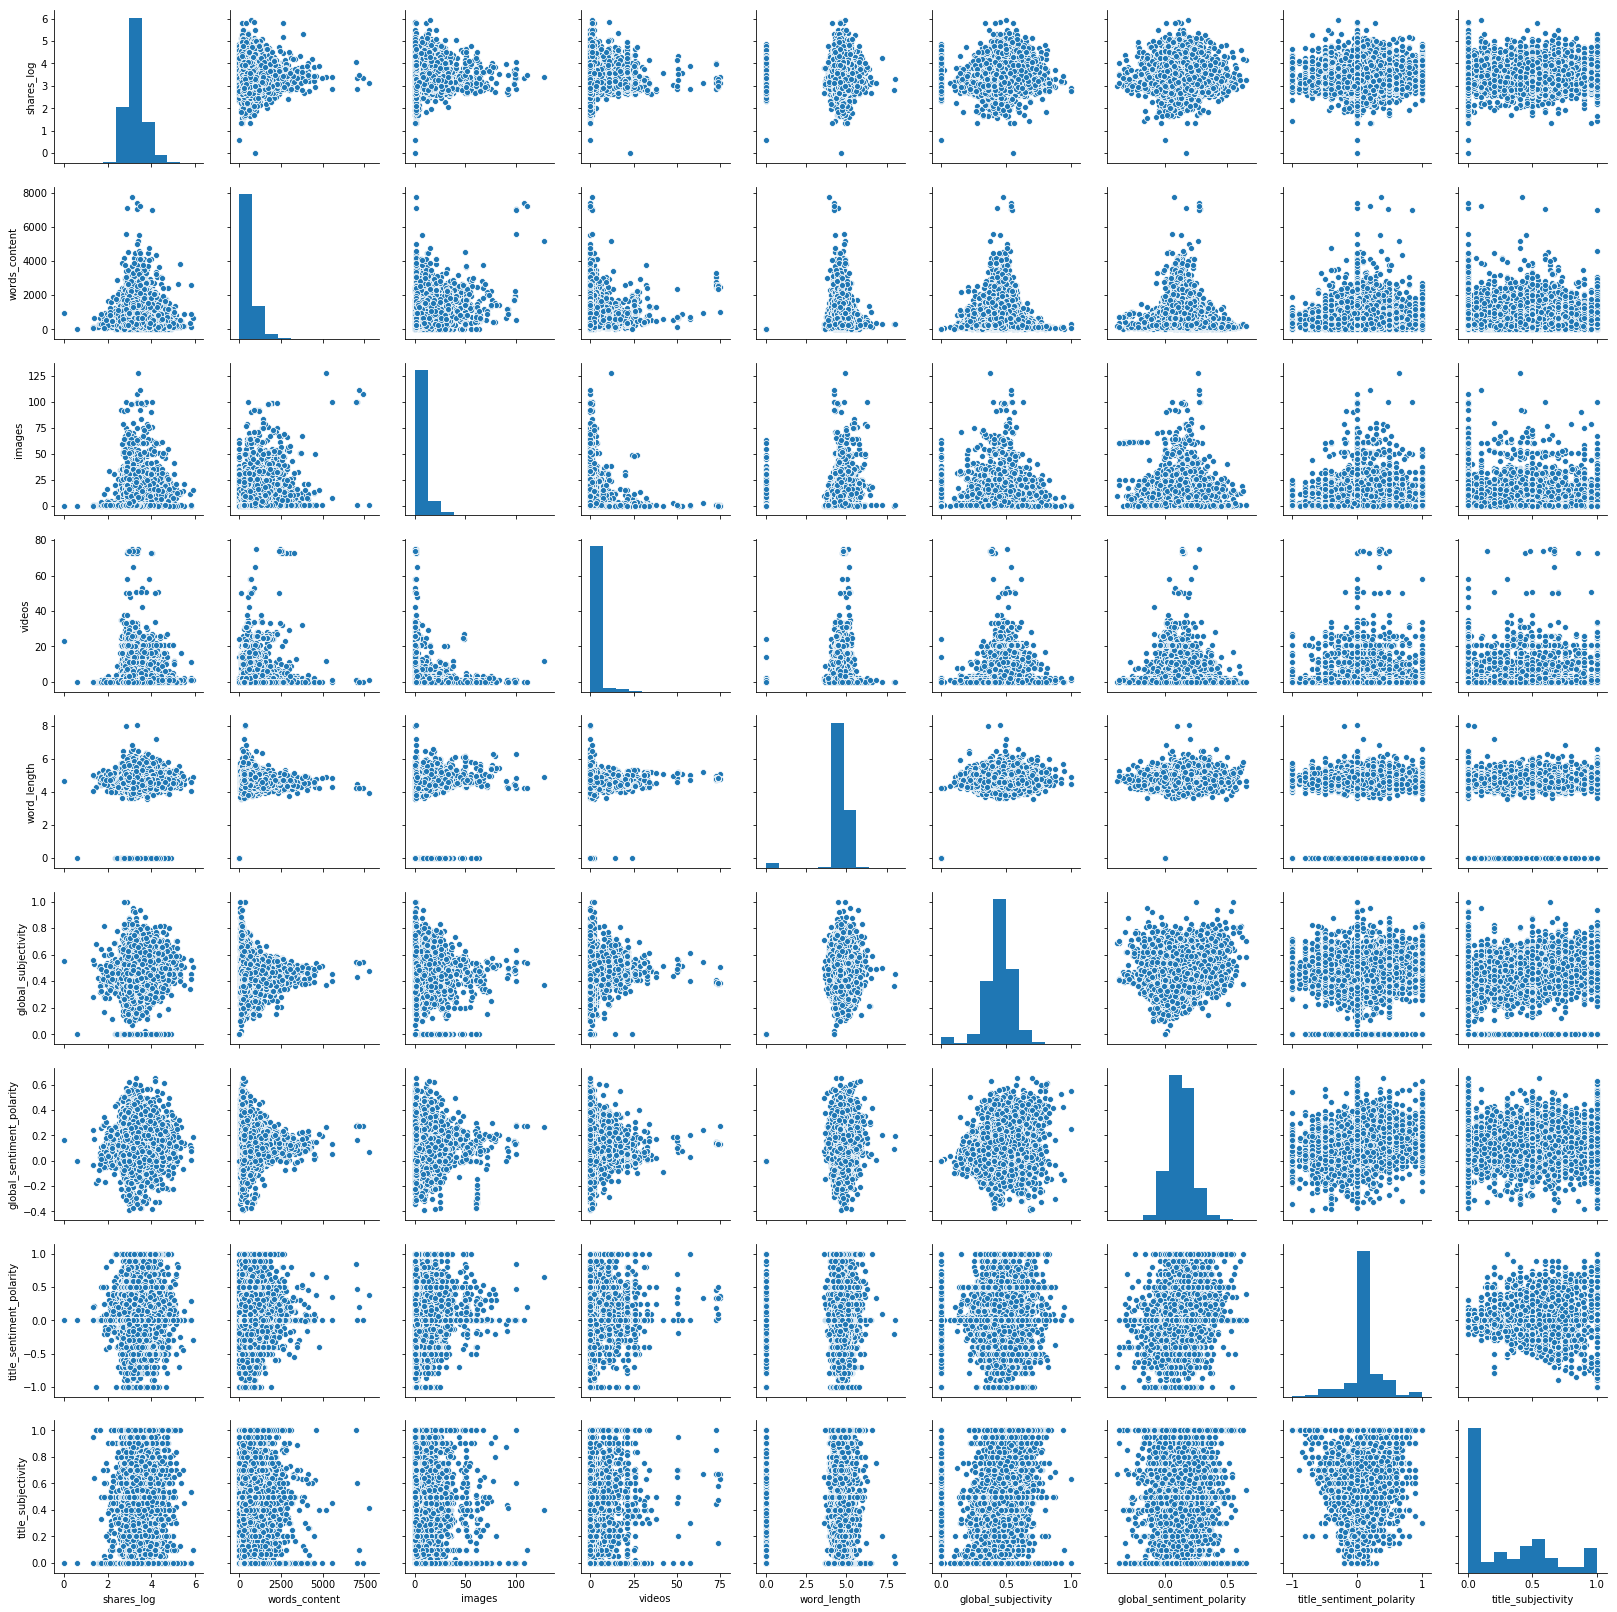

In [4]:
sns.pairplot(df[["shares_log","words_content", "images", "videos", "word_length", "global_subjectivity", "global_sentiment_polarity", "title_sentiment_polarity", "title_subjectivity"]])

Global subjectivity and word_lenght are showing a lot of zeroes in the pairplot, that seems odd and is probably not right. That's why I cleanded word_length and global_subjectivity.

In [5]:
def data_is_zero(x): #creating a function that removes the zeroes with NaN
    if (x == 0.0):
        return float('NaN')
    else:
        return x
    
df["word_length"] = df["word_length"].apply(data_is_zero)

df["global_subjectivity"] = df["global_subjectivity"].apply(data_is_zero)

df = df.dropna() #dropping all the NaN, so it's possible to work with it. 

In the following step I've choosen to use 5 values. I've choosen these values based on the pairplot above. The values i've chosen are showing a more specific shape in combination with shareslog. We've to predict the shareslog, so when there's a stronger shape in combination with the value it's likley more influencing the shares. 

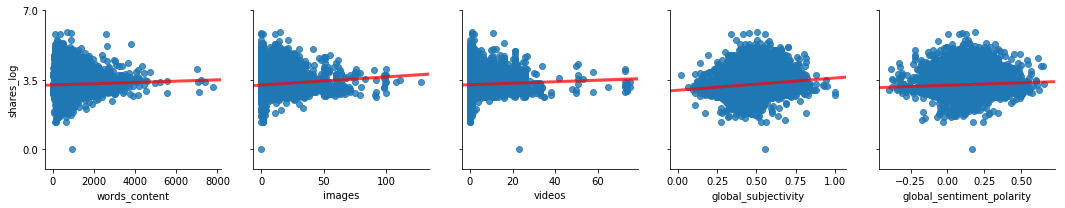

In [6]:
g = sns.PairGrid(df, y_vars=["shares_log"], x_vars=["words_content", "images", "videos", "global_subjectivity", "global_sentiment_polarity"], height=3)
g.map(sns.regplot, line_kws={"color":"r","alpha":0.7,"lw":3}) #red regressionline

g.set(ylim=(-1, 7), yticks=[0, 3.5, 7]);

Linearity: Yes.  All the five chosen values do have a straight red regression line in the middle of the dots, which means that they all are liniear. 

Equal Variance: No. The words_content, images and videos are showing more dots near to eachtother in the beginning of the plot (left side) and the distance between the dots increases while going left.  The values global subjectivity and global sentiment polarity are showing the least distance in the middle, both are showing less distance on the left and right side. 

In [7]:
y = df['shares_log'] #y is the dependend value, beceause we need to predict the shares.

X = df[["words_content", "images", "videos", "global_subjectivity","global_sentiment_polarity" ]] #X are the independent values
X.index = df["id"]

X.head()

,words_content,images,videos,global_subjectivity,global_sentiment_polarity
id,,,,,
1,821,12,0,0.439379,0.082486
2,489,6,0,0.300454,0.027715
3,131,0,1,0.575486,0.259120
4,556,2,0,0.327220,0.134424
5,880,18,0,0.507709,0.109256


In [8]:
from sklearn.model_selection import train_test_split #importing test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) #creating testset
X_train.head()

,words_content,images,videos,global_subjectivity,global_sentiment_polarity
id,,,,,
6890,374,1,1,0.537034,0.333770
5044,611,1,0,0.427397,0.050961
2496,267,2,0,0.456326,-0.084290
217,1295,34,0,0.383252,0.121176
10320,905,15,0,0.521724,0.212735


In [9]:
from sklearn.linear_model import LinearRegression #import linear regression
lm = LinearRegression() #creating a new linear regression model
lm.fit(X_train, y_train) #fitting the moddel with the X_train and y_train

b0 = lm.intercept_ 
b1 = lm.coef_[1]

coef = pd.DataFrame(X.columns.values, lm.coef_) 
coef

,0
0.000015,words_content
0.003105,images
0.003074,videos
0.505129,global_subjectivity
0.135288,global_sentiment_polarity


This shows for each variable in the data set how mhuch the share rate possible will increase. 

In [10]:
#Evaluating the model on the test data
#Predictive power of the model (R2, RMSE)
from sklearn.metrics import r2_score
y_test_p = lm.predict(X_test) #Generate predictions for the test data. So we use X.test, not X.train
r2_score(y_test, y_test_p)

0.03019364232951427

Only 3% of the variation in the shares could be explained by this model, that's very low.

In [11]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_test, y_test_p))

0.3987062719675461

The mean squared error shows that the data points with the actual shares are 0.4 point from the regression line. 

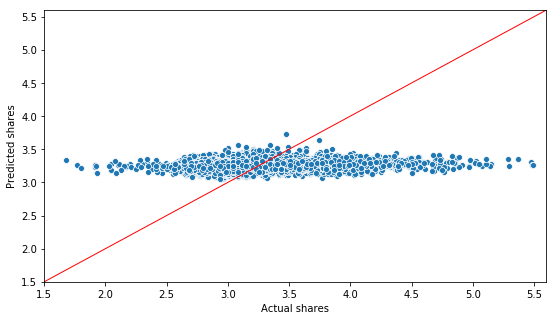

In [12]:
plt.figure(figsize=(9,5))
sns.scatterplot(y_test, y_test_p)
plt.xlabel('Actual shares')
plt.ylabel('Predicted shares')
plt.xlim ([1.5 , 5.6]) #making the graph 
plt.ylim([1.5 , 5.6])
plt.plot([1.5,5.6], [1.5 , 5.6], color='red', lw=1)
plt.show()

The red line in the scatterplot shows the residuals, the dots are showing the actual shares. The actual shares don't lie around the red line, which means tht the predicted shares in this model aren't close to the actual shares.  

In [13]:
df["predicted_shares"] = lm.predict(X)
df

,id,url,words_title,words_content,images,videos,word_length,lifestyle,entertainment,business,...,saturday,sunday,weekend,global_subjectivity,global_sentiment_polarity,title_subjectivity,title_sentiment_polarity,shares,shares_log,predicted_shares
0,1,http://mashable.com/2013/10/29/ashton-kutcher-...,10,821,12,0,4.518879,0,0,0,...,0,0,0,0.439379,0.082486,0.666667,0.375000,2100,3.322219,3.259304
1,2,http://mashable.com/2014/09/08/mashies-sept-19...,9,489,6,0,5.040900,0,0,0,...,0,0,0,0.300454,0.027715,0.000000,0.000000,274,2.437751,3.158211
2,3,http://mashable.com/2013/02/01/hello-kitty-roc...,11,131,0,1,4.877863,0,0,0,...,0,0,0,0.575486,0.259120,0.000000,0.000000,1500,3.176091,3.307627
3,4,http://mashable.com/2014/02/06/add-us-on-snapc...,8,556,2,0,4.974820,0,0,1,...,0,0,0,0.327220,0.134424,0.000000,0.000000,2000,3.301030,3.174733
4,5,http://mashable.com/2014/01/07/lindsey-vonn-wi...,9,880,18,0,4.928409,0,0,0,...,0,0,0,0.507709,0.109256,0.000000,0.000000,6000,3.778151,3.316938
5,6,http://mashable.com/2014/04/24/amazing-lebron-...,13,303,2,0,4.970297,0,0,0,...,0,0,0,0.394298,0.048684,0.000000,0.000000,1200,3.079181,3.193298
6,7,http://mashable.com/2013/06/22/social-media-we...,6,544,11,0,4.617647,0,0,0,...,1,0,1,0.439512,0.267391,0.500000,0.500000,3500,3.544068,3.277211
7,8,http://mashable.com/2013/07/09/russian-deletes...,12,223,1,0,4.399103,0,0,0,...,0,0,0,0.394792,0.053125,0.218182,0.145455,1500,3.176091,3.189868
8,9,http://mashable.com/2013/03/07/3d-printed-skull/,8,438,1,0,5.027397,0,0,0,...,0,0,0,0.479187,0.166913,0.500000,0.200000,3100,3.491362,3.251052
9,10,http://mashable.com/2013/11/16/xbox-one-vs-pla...,11,389,1,1,4.642674,0,0,1,...,1,0,1,0.417229,0.183895,0.166667,0.000000,27300,4.436163,3.224406


In [17]:
#Use your model to generate predictions for the hold-out test data set and create a csv file 
#with all variables, including the predictors. Upload this file with your assignment.

with open('shares_and_predicted shares.csv', 'a') as f:
    df.to_csv(f, header = False)